## Задание 1. Свёртка

**5 баллов**

Реализуйте функцию свёртки `conv(x, kernel, stride, pad)`, где:


* $\text{x}$: Двумерный массив размером $(W,H)$;
* $\text{kernel}$: ядро свёртки размером $(K, K)$;
* $\text{stride}$: шаг ядра свёртки. $0 < \text{stride} \leq \min(W,H)$;
* $\text{pad}$: ширина дополнения с каждой из сторон массива. $\text{pad} > 0$.

Результатм работы функции является возвращение следующего значения:
* $out$: Результат свертки входных данных $\text{x}$, имеющий размер $(H', W')$: 
  - $H' = 1 + (H + 2 \cdot pad - K)\ //\  stride$;
  - $W' = 1 + (W + 2 \cdot pad - K)\  //\ stride$.

---

Воспользуйтесь созданной функцией `conv` для применения [оператора Собеля](https://ru.wikipedia.org/wiki/%D0%9E%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80_%D0%A1%D0%BE%D0%B1%D0%B5%D0%BB%D1%8F) 
к изображению, после чего выведите результат на экран.

Можно работать и с `numpy`, и с `torch`, как вам угодно.

In [1]:
import torch
import numpy as np

In [31]:
# Можете тренироваться на этом примере
a = np.arange(9).reshape((3, 3))
M = np.block([[a, a],[a, a]])
print(M)

[[0 1 2 0 1 2]
 [3 4 5 3 4 5]
 [6 7 8 6 7 8]
 [0 1 2 0 1 2]
 [3 4 5 3 4 5]
 [6 7 8 6 7 8]]


In [99]:
def conv(x, kernel, stride, pad):
    '''
    Предполагаем, что kernel квадратный (width = height)
    Также предполагаем, что stride подобран хорошо 
        (не делаю проверки на ситуации когда stride вылезет за границы)
    '''

    # запоминаем размерности
    w = x.shape[0]
    h = x.shape[1] 
    # размерности итогового массива
    w_new = 1 + (w + 2*pad - kernel.shape[0]) // stride
    h_new = 1 + (h + 2*pad - kernel.shape[0]) // stride
    x_new = np.zeros((w_new, h_new))  # массив, куда будем записывать итоговую свёрткую

    if pad != 0:
        x_w_pad = np.zeros((w + pad*2, h + pad*2))  # Х, но с паддингами
        # print(x_w_pad.shape, x_w_pad[pad:-1*pad, pad:-1*pad].shape, x.shape)
        x_w_pad[pad:-1*pad, pad:-1*pad] = x         # центр заполняем старым иксом
    else:
        x_w_pad = x
    
    # print(x_w_pad)

    # итераторы i, j для итерации по массиву x_new (куда пишем результат свёртки)
    # итераторы h_iter, w_iter для итерации по входному массиву (который перемножаем со свёрткой)
    h_iter = 0
    for i in range(h):
        # если текущее положение > чем "высота" массива - размер ядра
        # т.е. если [как в примере] массив (6 х 6), а свёртка (3 х 3), 
        # то 4ая строка должна быть последней по которой мы пробежим
        # (верхушка ядра скользит по 4ой строке, а низ по 6ой)
        # (ну вернее по 3ей и 5ой, если нумерация с нуля)
        if h_iter > h - kernel.shape[0]: 
            break

        w_iter = 0
        for j in range(w):
            # аналогично, если мы сдвинулись слишком "вправо" по массиву,
            # то пора переходить на следующую строку
            if w_iter > w - kernel.shape[0]: 
                break

            # 
            # print(x_w_pad[h_iter: h_iter + kernel.shape[0], w_iter: w_iter + kernel.shape[0]])
            x_new[j, i] = (kernel * x_w_pad[w_iter: w_iter + kernel.shape[0], h_iter: h_iter + kernel.shape[0]]).sum()
            w_iter += stride
        h_iter += stride

    return x_new

In [33]:
sobel_kernel_vert = torch.Tensor([
                                  [-1, 0, 1],
                                  [-2, 0, 2],
                                  [-1, 0, 1]
])


sobel_kernel_hor = torch.Tensor([
                                 [-1, -2, -1],
                                 [0, 0, 0],
                                 [1, 2, 1]
])

In [100]:
# тестим раз

conv(M, sobel_kernel_vert, 1, 0)

array([[ 8., -4., -4.,  8.],
       [ 8., -4., -4.,  8.],
       [ 8., -4., -4.,  8.],
       [ 8., -4., -4.,  8.]])

In [101]:
# тестим два (новый stride)

conv(M, sobel_kernel_vert, 3, 0)

array([[8., 8.],
       [8., 8.]])

Примените эти два фильтра к следующей картинке и нарисуйте полученные результаты:

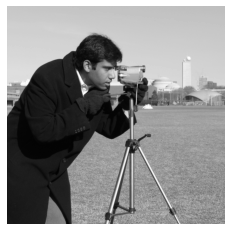

In [97]:
from skimage import data
import matplotlib.pyplot as plt

camera = data.camera()
plt.figure()
plt.imshow(camera.astype("int"), cmap="gray", vmin=0, vmax=255)
plt.axis("off");

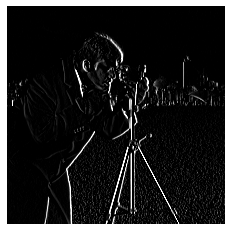

In [102]:
plt.figure()
plt.imshow(conv(camera, sobel_kernel_vert, 1, 0).astype("int"), cmap="gray", vmin=0, vmax=255)
plt.axis("off");

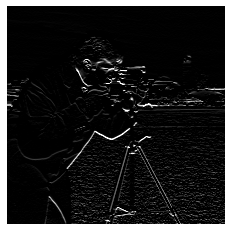

In [103]:
plt.figure()
plt.imshow(conv(camera, sobel_kernel_hor, 1, 0).astype("int"), cmap="gray", vmin=0, vmax=255)
plt.axis("off");

Допишите код ниже и проинтерпретируйте полученный результат:

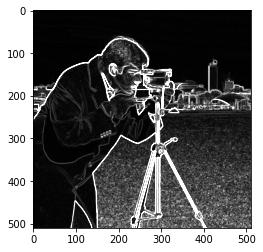

In [104]:
camera_s_hor_filter = conv(camera, sobel_kernel_hor, 1, 0)  # результат применения sobel_kernel_hor
camera_s_vert_filter = conv(camera, sobel_kernel_vert, 1, 0)  # результат применения sobel_kernel_vert
camera_with_borders = np.sqrt(camera_s_hor_filter**2 + camera_s_vert_filter**2)
plt.imshow(camera_with_borders, cmap="gray", vmin=0, vmax=255);

**Итого:** каждый из фильтров позволяет сакцентироваться на чём-то вроде вертикальных и горизонтальных границ объёктов, а совместное применение, таким образом, позволяет выделить все границы объектов.

## Задание 2. AlexNet

**15 баллов**

Воссоздайте архитектуру `AlexNet` для определения заболевания растения. Датасеты уже созданы ниже.

In [21]:
INPUT_IMAGE_SIZE = 227
BATCH_SIZE = 64
N_EPOCHS = 20 # можно будет при желании увеличить
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
from IPython.display import clear_output

from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Compose, ToPILImage
from torchvision.transforms import Normalize, Resize

from glob import glob
from torch import nn
from torch.nn import functional as F
import torch
import os
 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
!wget https://storage.googleapis.com/ibeans/train.zip
!wget https://storage.googleapis.com/ibeans/validation.zip
!wget https://storage.googleapis.com/ibeans/test.zip

clear_output()

In [5]:
!unzip train.zip
!unzip validation.zip
!unzip test.zip

clear_output()

In [6]:
class BeanDataset(Dataset):
    def __init__(self, img_dir, side_size=INPUT_IMAGE_SIZE):
        # папка с картинками
        self.img_dir = img_dir
        # отсортированный список с названиями файлов
        self.files = sorted(glob(f'{img_dir}/*/*.jpg'))
        class_names = sorted(os.listdir(img_dir))
        # названия папок с картинками переведем в номера классов
        self.class_dir = {name:idx for idx, name in enumerate(class_names)}
        self._number_to_labels = {idx:name for idx, name in enumerate(class_names)}

        # трансформации данных: мы изменяем размер,
        # так как AlexNet работает с картинками 227 на 227 пикселей
        self.transforms = Compose([ToPILImage(),
                                  Resize(side_size),
                                  ToTensor(),
                                  Normalize(
                                      mean = [0.5183, 0.4845, 0.6570],
                                      std = [0.2111, 0.2227, 0.2291]
                                  )])
        self._transforms_for_plot = Compose([ToPILImage(),
                                  Resize(side_size),
                                  ToTensor()
                                  ])


    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx, normalize=True):
        file_path = self.files[idx]
        image = read_image(file_path).type(torch.DoubleTensor)

        # применяем трансформации
        if normalize:
            transformed_img = self.transforms(image)
        
        transformed_img = self._transforms_for_plot(image)
        
        label_name = file_path.split('/')[-2]
        label = self.class_dir[label_name]
        
        # как обычно возвращаем картинку и номер класса
        return transformed_img, label

In [7]:
train_dataset = BeanDataset("./train/")
valid_dataset = BeanDataset("./validation/")
test_dataset = BeanDataset("./test/")

# Каждый возвращает набор картинок (b x 3 x 227 x 227) и набор меток (b),
# где b -- batch size -- 64
trainloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
validloader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
testloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

Посмотрим на наши картинки:

(код довольно эзотерический, но у меня было такое настроение)

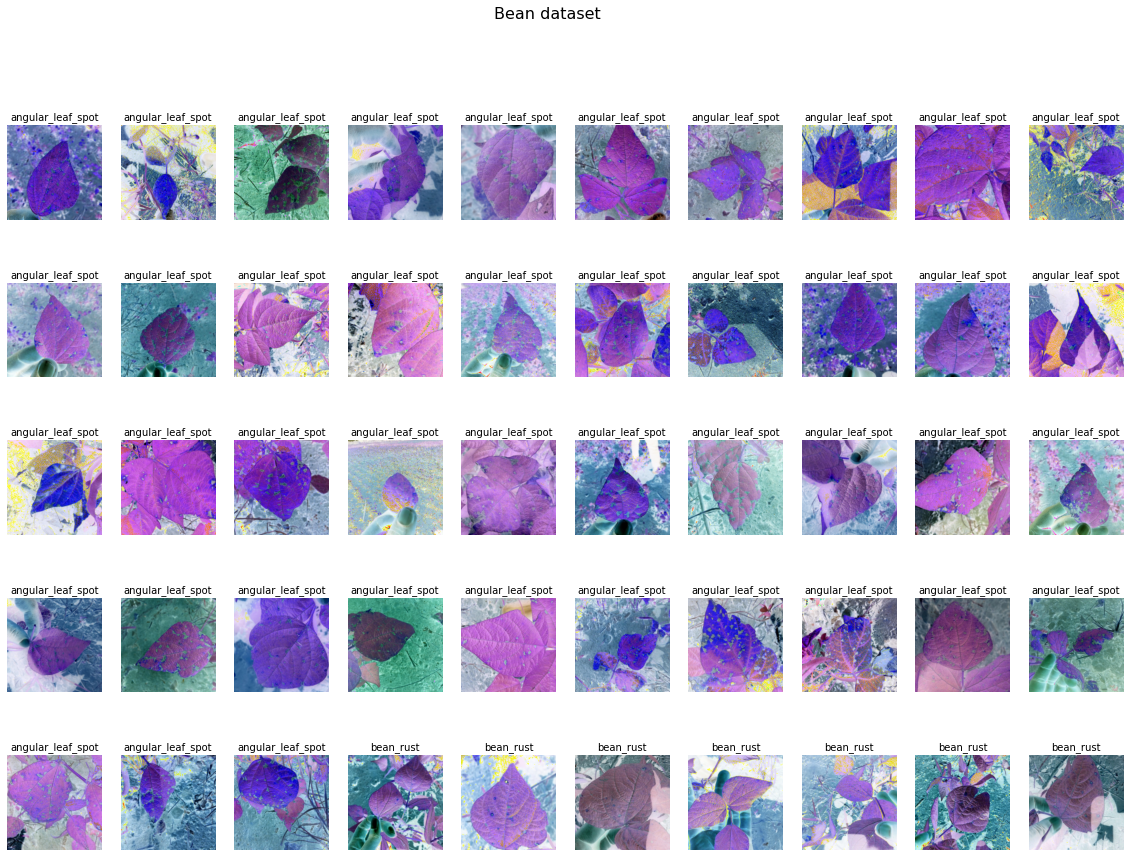

In [12]:
ROW_IMG = 10
N_ROWS = 5

fig = plt.figure(figsize=(20, 14))
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(valid_dataset.__getitem__(index, normalize=False)[0].permute(1, 2, 0))
    title = valid_dataset._number_to_labels[valid_dataset.__getitem__(index, normalize=False)[1]]
    plt.title(title, fontsize=10)
    
fig.suptitle("Bean dataset", fontsize=16);

### Реализация `AlexNet`

В лекции мы познакомились с архитектурой `AlexNet`, теперь пришло время реализовать ее самостоятельно. Важно, что на выходе число классов у нас будет сильно меньше чем 1000, нужно будет в начале это определить. Везде в качестве активации используется `ReLU`.

Также обратите внимание на параметры пулинга, тут ядро 3х3 со страйдом 2 (поэтому он называется overlapping).

Картинка может немного отличаться от того, что было на лекции, ориентируйтесь на картинку в ноутбуке.

Внимательно смотрите на параметры сверток (например, padding / stride).

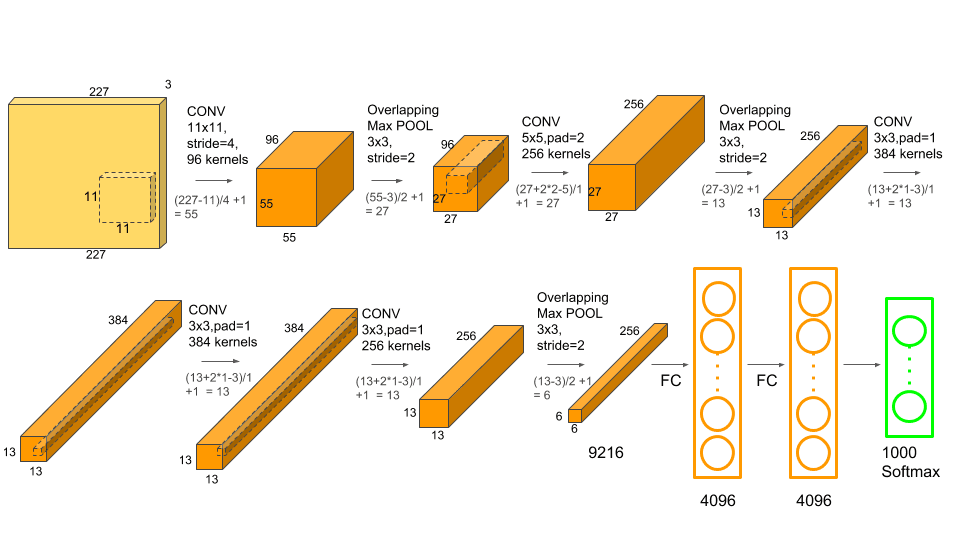

In [13]:
# смотрим на число классов

label_aggr = set()

for _, label in trainloader:
    label_aggr = label_aggr | set(label.tolist())

n = len(label_aggr)

In [14]:
print(f'number of classes = {n}: {label_aggr}')

number of classes = 3: {0, 1, 2}


In [15]:
N_CLASSES = 3  ## определите число классов в данных
LEARNING_RATE = 3e-4  # можно подобрать как-то другой)

In [16]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=3):
        super().__init__()
                                                                                     # (b x 3 x 227 x 227)
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4),     # (b x 96 x 55 x 55)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),                                   # (b x 96 x 27 x 27)
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, padding=2),   # (b x 256 x 27 x 27)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),                                   # (b x 256 x 13 x 13)
            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, padding=1),  # (b x 384 x 13 x 13)
            nn.ReLU(),
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, padding=1),  # (b x 384 x 13 x 13)
            nn.ReLU(),
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, padding=1),  # (b x 256 x 13 x 13)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),                                   # (b x 256 x 6 x 6)
        )

        self.classifier = nn.Sequential(
            nn.Linear(in_features=(256 * 6 * 6), out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=num_classes),
        )

    def forward(self, x):
        x = self.feature_extractor(x)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        probs = F.softmax(logits, dim=1)

        # output : ( (b x 10), (b x 10) )
        return logits, probs

Возьмите код для обучения и валидации модели, который был на лекции (если захочется, то его можно как угодно менять). В лекции мы возвращали из модели помимо логитов еще и вероятности классов, чтобы потом рисовать красивые картинки. Если захотите сделать также, то учтите это.

In [17]:
def train_epoch(train_loader, model, criterion, optimizer, device):
    """
    Function for the training step of the training loop
    """

    model.train()
    running_loss = 0
    
    for X, y_true in train_loader:

        optimizer.zero_grad()
        
        X = X.to(device)
        y_true = y_true.to(device)

        y_hat, _ = model(X) 
        loss = criterion(y_hat, y_true) 
        running_loss += loss.item() * X.size(0)

        loss.backward()
        optimizer.step()
        
    epoch_loss = running_loss / len(train_loader.dataset)
    return model, optimizer, epoch_loss


def validate_epoch(valid_loader, model, criterion, device):
    """
    Function for the validation step of the training loop
    """
   
    model.eval()
    running_loss = 0
    
    for X, y_true in valid_loader:
    
        X = X.to(device)
        y_true = y_true.to(device)

        y_hat, _ = model(X) 
        loss = criterion(y_hat, y_true) 
        running_loss += loss.item() * X.size(0)

    epoch_loss = running_loss / len(valid_loader.dataset)
        
    return model, epoch_loss


def get_accuracy(model, dataloader, device):
    """
    model - 
    dataloader - 
    """
    correct = 0
    total = 0
    with torch.no_grad(): # Тензоры внутри этого блока будут иметь requires_grad=False
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs, _ = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    
    return accuracy


def plot_losses(train_losses, valid_losses):
    sns.lineplot(x=np.arange(1, len(train_losses)+1), y=train_losses, label="Train Loss")
    sns.lineplot(x=np.arange(1, len(train_losses)+1), y=valid_losses, label="Validation Loss")


def training_loop(model, criterion, optimizer, train_loader, valid_loader, epochs, device, print_every=1):
    """
    Function defining the entire training loop
    """

    best_loss = 1e10
    train_losses = []
    valid_losses = []
 
    # Train model
    for epoch in range(0, epochs):

        # training
        model, optimizer, train_loss = train_epoch(train_loader, model, criterion, optimizer, device)
        train_losses.append(train_loss)

        # validation
        with torch.no_grad():
            model, valid_loss = validate_epoch(valid_loader, model, criterion, device)
            valid_losses.append(valid_loss)

        if epoch % print_every == (print_every - 1):
            
            train_acc = get_accuracy(model, train_loader, device=device)
            valid_acc = get_accuracy(model, valid_loader, device=device)
                
            print(f'{datetime.now().time().replace(microsecond=0)} --- '
                  f'Epoch: {epoch}\t'
                  f'Train loss: {train_loss:.4f}\t'
                  f'Valid loss: {valid_loss:.4f}\t'
                  f'Train accuracy: {100 * train_acc:.2f}\t'
                  f'Valid accuracy: {100 * valid_acc:.2f}')

    plot_losses(train_losses, valid_losses)
    
    return model, train_losses, valid_losses

Выберите функцию потерь и оптимизатор и обучите полученную модель на тренировочных данных, параллельно проверяя ее на валидационной части:

In [22]:
model = AlexNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)  # Оптимизатор
criterion = nn.CrossEntropyLoss()  # Функция потерь

11:42:34 --- Epoch: 0	Train loss: 1.1001	Valid loss: 1.0840	Train accuracy: 33.75	Valid accuracy: 33.83
11:43:13 --- Epoch: 1	Train loss: 0.9996	Valid loss: 0.8191	Train accuracy: 55.80	Valid accuracy: 54.14
11:43:51 --- Epoch: 2	Train loss: 0.9907	Valid loss: 1.0537	Train accuracy: 41.39	Valid accuracy: 42.11
11:44:29 --- Epoch: 3	Train loss: 0.9164	Valid loss: 0.8055	Train accuracy: 58.32	Valid accuracy: 57.14
11:45:07 --- Epoch: 4	Train loss: 0.8195	Valid loss: 0.7552	Train accuracy: 67.89	Valid accuracy: 66.17
11:45:45 --- Epoch: 5	Train loss: 0.7581	Valid loss: 0.8516	Train accuracy: 63.06	Valid accuracy: 65.41
11:46:23 --- Epoch: 6	Train loss: 0.7534	Valid loss: 0.6464	Train accuracy: 71.76	Valid accuracy: 72.18
11:47:01 --- Epoch: 7	Train loss: 0.6440	Valid loss: 0.5989	Train accuracy: 75.73	Valid accuracy: 74.44
11:47:39 --- Epoch: 8	Train loss: 0.5948	Valid loss: 0.7258	Train accuracy: 69.15	Valid accuracy: 66.17
11:48:18 --- Epoch: 9	Train loss: 0.6589	Valid loss: 0.5866	Trai

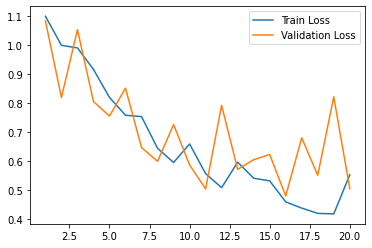

In [23]:
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, N_EPOCHS, DEVICE)

Если вы все реализовали правильно, то `accuracy` на валидации должна быть в районе 0.8.

### Визуализация предсказаний

Визуализируем предсказания нашей модели и степень уверенности в них. Сделайте выводы о качестве полученной модели.

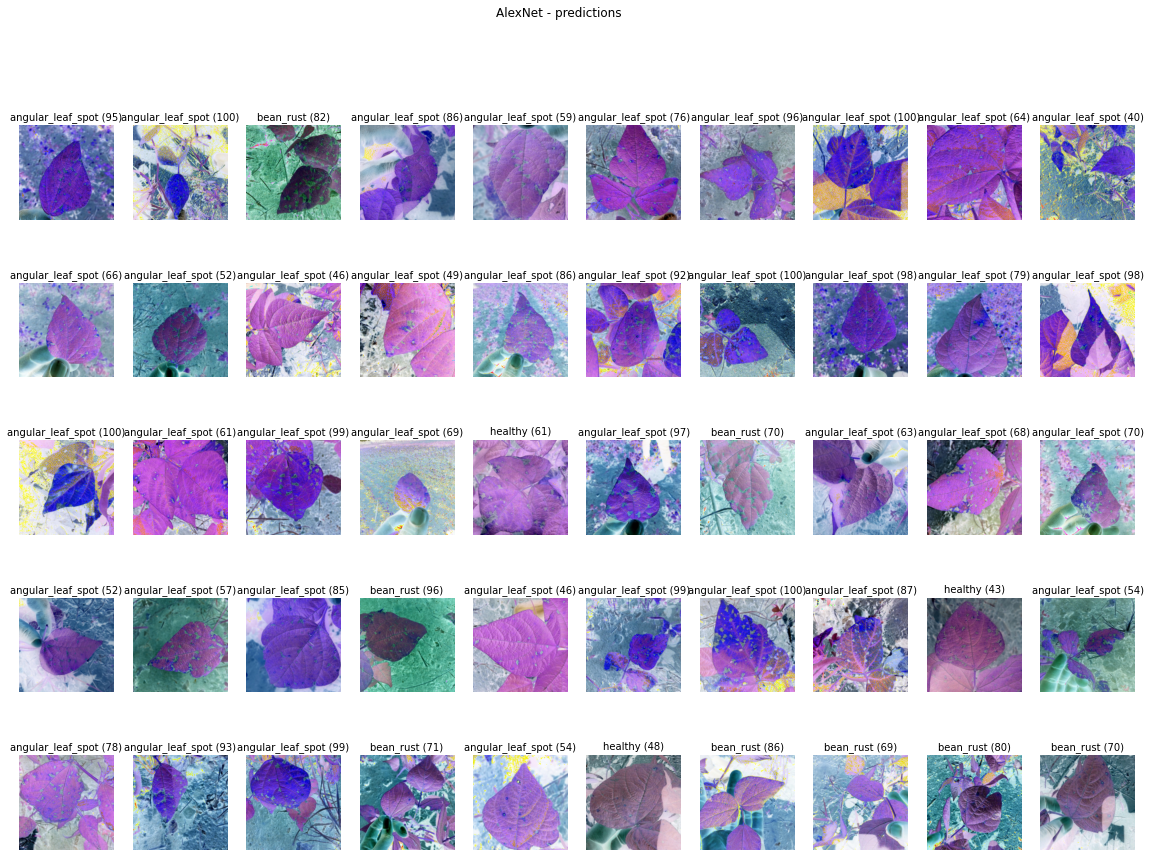

In [24]:
ROW_IMG = 10
N_ROWS = 5

fig = plt.figure(figsize=(20, 14))
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(valid_dataset.__getitem__(index, normalize=False)[0].permute(1, 2, 0))
    
    with torch.no_grad():
        # error)
        model.cpu().eval()
        _, probs = model(valid_dataset[index][0].unsqueeze(0))
        
    title = f'{torch.argmax(probs)} ({torch.max(probs * 100):.0f}%)'
    title = f"{valid_dataset._number_to_labels[torch.argmax(probs).item()]} ({torch.max(probs * 100):.0f})"
    
    plt.title(title, fontsize=10)
fig.suptitle('AlexNet - predictions');

In [29]:
# протестируем ещё модель на тестовом датасете (не зря же грузили его)

with torch.no_grad():
    model, test_loss = validate_epoch(testloader, model.to(DEVICE), criterion, DEVICE)
    test_acc = get_accuracy(model, testloader, device=DEVICE)

print(f'Test loss: {test_loss:.4f}\t'
      f'Test accuracy: {100 * test_acc:.2f}\t')

Test loss: 0.4259	Test accuracy: 83.59	


**Итого:** в большинстве картинок модель довольно-таки уверена, и, насколько я могу визуально оценить, предсказывает правильно)
Итоговая accuracy получилась неплохая, но наверное можно было бы накинуть каких-нибудь дропаутов и улучшить результат.

## Задание 3. И снова социализация

**1 дополнительный балл**

Однажды такое уже бывало, но почему бы не повторить. Сходите погулять вместе с одногруппниками или созвонитесь в зуме, а сюда прикрепите какие-нибудь фотографии и кратко опишите, на какие темы вы общались)

Тут, как обычно, можно описать свои эмоции от выполнения этого задания:

**Ответ:**